# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
# Data manipulation & analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Machine Learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Additional utilities
import warnings
warnings.filterwarnings('ignore')

print("Semua library berhasil diimport!")

Semua library berhasil diimport!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Load dataset Heart Disease dari UCI
# Menggunakan dataset yang sudah tersedia di repositori UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Nama kolom sesuai dokumentasi UCI
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# Membaca data
heart_data = pd.read_csv(url, names=column_names, na_values='?')

print("Dataset Heart Disease berhasil dimuat!")
print(f"Shape dataset: {heart_data.shape}")
print(f"Kolom yang tersedia: {list(heart_data.columns)}")

# Preview data
print("\n 5 sample data pertama:")
display(heart_data.head())

print("\n Info dataset:")
heart_data.info()

print("\n Distribusi target:")
print(heart_data['target'].value_counts().sort_index())

Dataset Heart Disease berhasil dimuat!
Shape dataset: (303, 14)
Kolom yang tersedia: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

 5 sample data pertama:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



 Info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB

 Distribusi target:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

 STATISTIK DESKRIPTIF:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000



 CEK MISSING VALUES:
ca      4
thal    2
dtype: int64


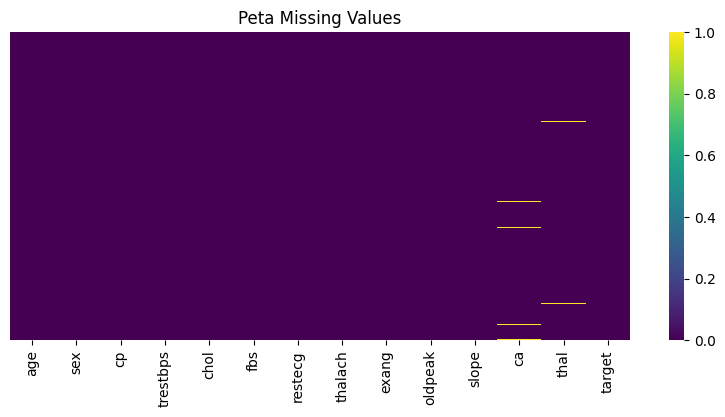


 DISTRIBUSI TARGET (Penyakit Jantung):


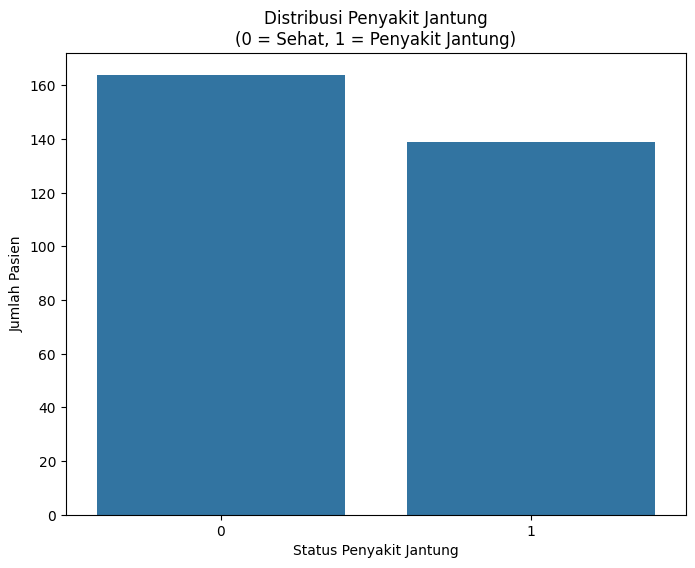

Distribusi target (binary):
heart_disease
0    164
1    139
Name: count, dtype: int64

 HEATMAP KORELASI:


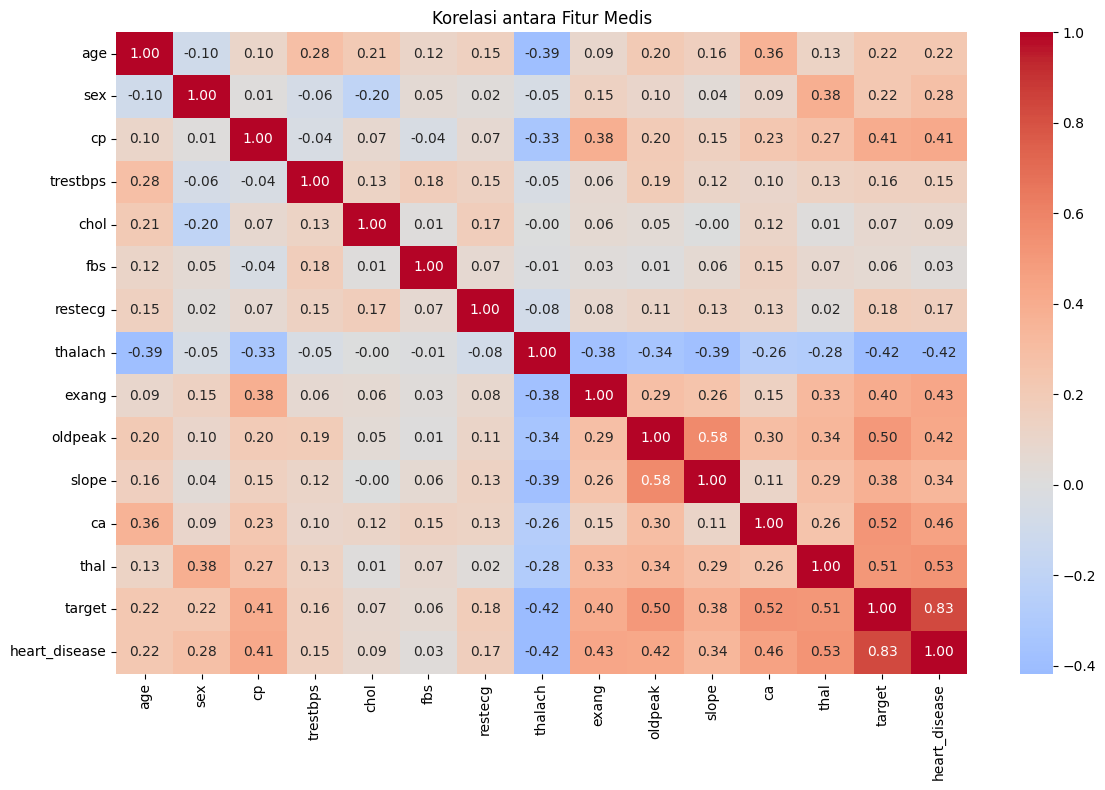


 DISTRIBUSI FITUR NUMERIK PENTING:


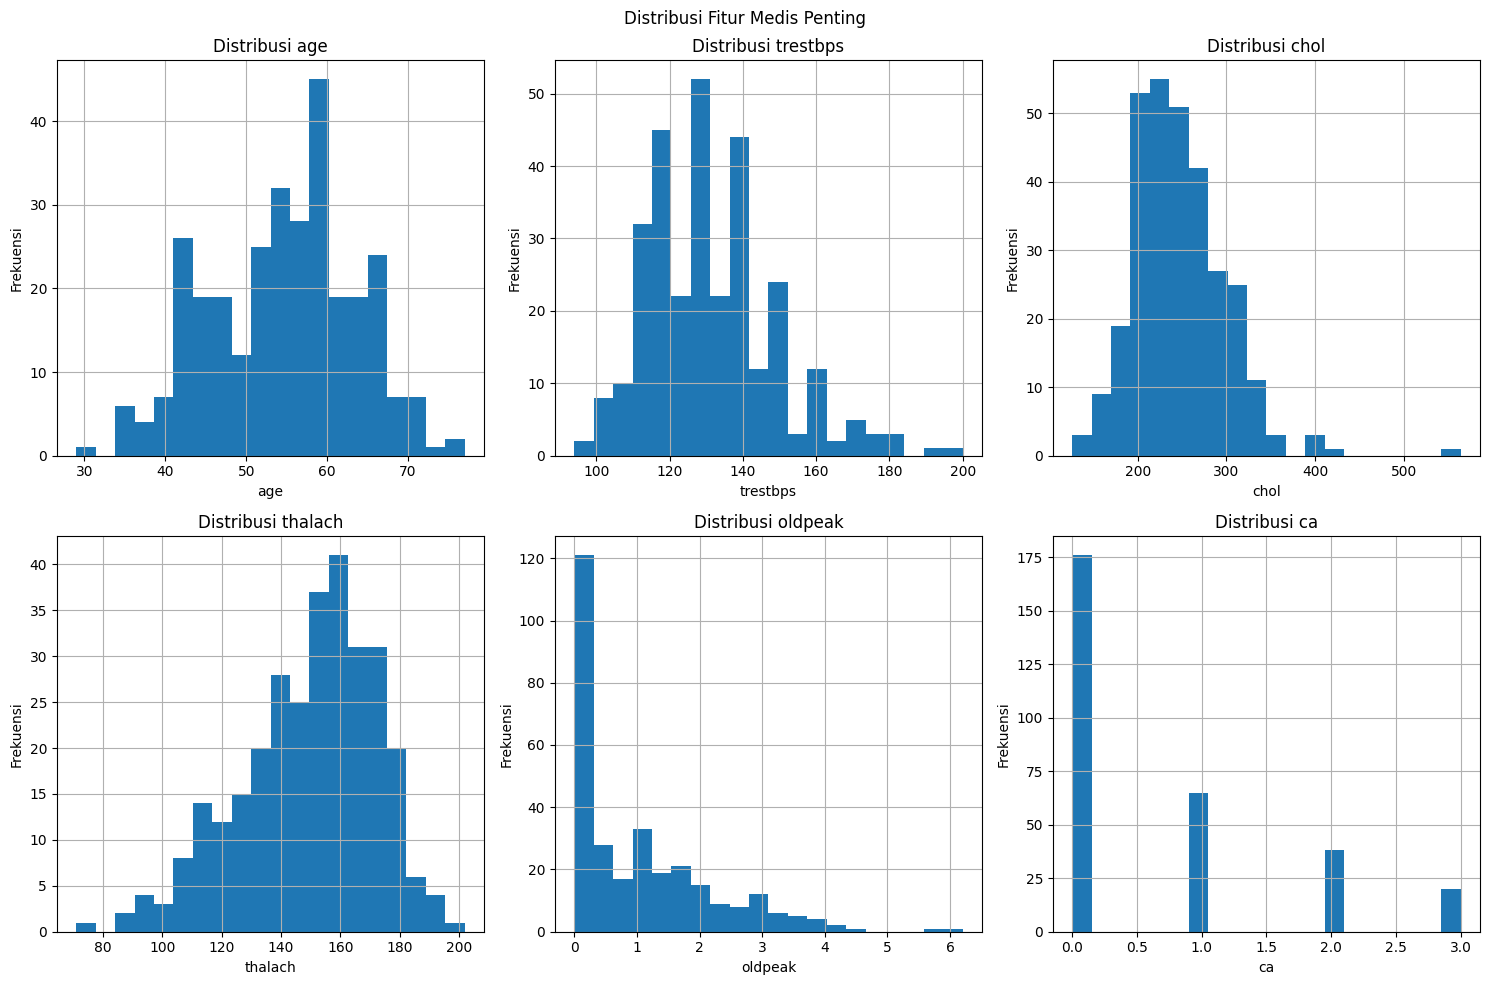


👥 ANALISIS BERDASARKAN JENIS KELAMIN (sex: 0 = wanita, 1 = pria):


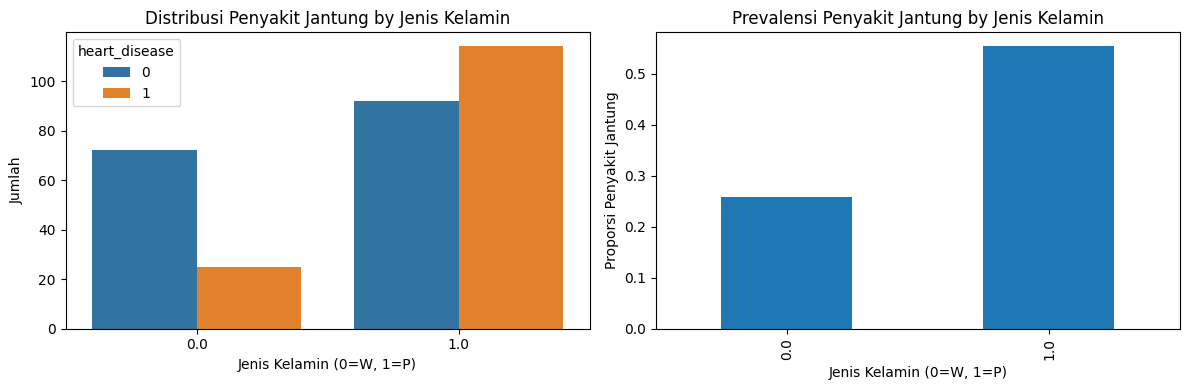


 AGE vs CHOLESTEROL BY HEART DISEASE:


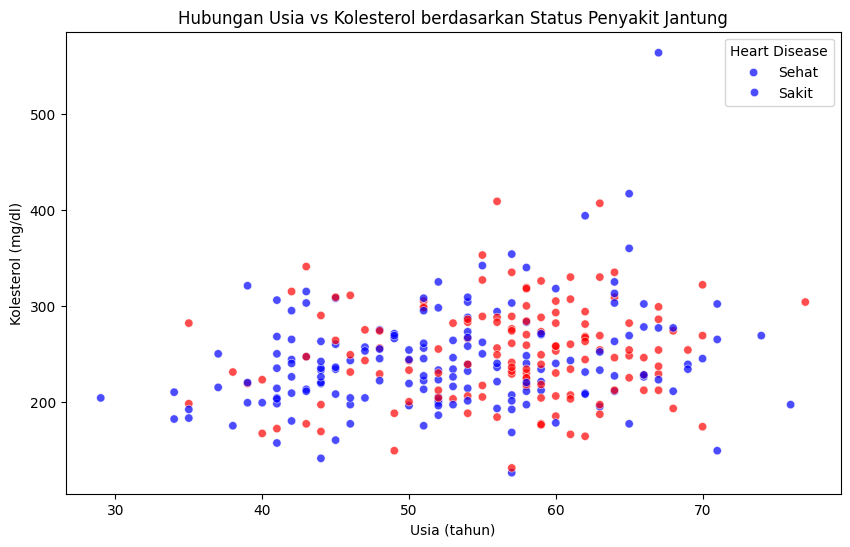

In [3]:
# Statistik Deskriptif
print(" STATISTIK DESKRIPTIF:")
display(heart_data.describe())

# Cek missing values
print("\n CEK MISSING VALUES:")
missing_data = heart_data.isnull().sum()
print(missing_data[missing_data > 0])

# Visualisasi missing values
if missing_data.sum() > 0:
    plt.figure(figsize=(10, 4))
    sns.heatmap(heart_data.isnull(), cbar=True, yticklabels=False, cmap='viridis')
    plt.title('Peta Missing Values')
    plt.show()

# Distribusi Target
print("\n DISTRIBUSI TARGET (Penyakit Jantung):")
# Konversi ke binary: 0 = no disease, >0 = disease
heart_data['heart_disease'] = (heart_data['target'] > 0).astype(int)

plt.figure(figsize=(8, 6))
sns.countplot(data=heart_data, x='heart_disease')
plt.title('Distribusi Penyakit Jantung\n(0 = Sehat, 1 = Penyakit Jantung)')
plt.xlabel('Status Penyakit Jantung')
plt.ylabel('Jumlah Pasien')
plt.show()

print("Distribusi target (binary):")
print(heart_data['heart_disease'].value_counts())

# Korelasi antara fitur
print("\n HEATMAP KORELASI:")
plt.figure(figsize=(12, 8))
correlation_matrix = heart_data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Korelasi antara Fitur Medis')
plt.tight_layout()
plt.show()

# Distribusi fitur penting
print("\n DISTRIBUSI FITUR NUMERIK PENTING:")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

important_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']

for i, feature in enumerate(important_features):
    if feature in heart_data.columns:
        heart_data[feature].hist(bins=20, ax=axes[i])
        axes[i].set_title(f'Distribusi {feature}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Frekuensi')

plt.suptitle('Distribusi Fitur Medis Penting')
plt.tight_layout()
plt.show()

# Analisis berdasarkan jenis kelamin
print("\n👥 ANALISIS BERDASARKAN JENIS KELAMIN (sex: 0 = wanita, 1 = pria):")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=heart_data, x='sex', hue='heart_disease')
plt.title('Distribusi Penyakit Jantung by Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0=W, 1=P)')
plt.ylabel('Jumlah')

plt.subplot(1, 2, 2)
heart_data.groupby('sex')['heart_disease'].mean().plot(kind='bar')
plt.title('Prevalensi Penyakit Jantung by Jenis Kelamin')
plt.xlabel('Jenis Kelamin (0=W, 1=P)')
plt.ylabel('Proporsi Penyakit Jantung')

plt.tight_layout()
plt.show()

# Relationship: Age vs Cholesterol by Heart Disease
print("\n AGE vs CHOLESTEROL BY HEART DISEASE:")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=heart_data, x='age', y='chol', hue='heart_disease',
                palette=['blue', 'red'], alpha=0.7)
plt.title('Hubungan Usia vs Kolesterol berdasarkan Status Penyakit Jantung')
plt.xlabel('Usia (tahun)')
plt.ylabel('Kolesterol (mg/dl)')
plt.legend(title='Heart Disease', labels=['Sehat', 'Sakit'])
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [4]:
# Copy data untuk preprocessing
heart_clean = heart_data.copy()

print("MEMULAI DATA PREPROCESSING...")
print(f"Shape awal: {heart_clean.shape}")

# Handle missing values
print("\n HANDLE MISSING VALUES:")
missing_before = heart_clean.isnull().sum()
print("Missing values sebelum handling:")
print(missing_before[missing_before > 0])

# Isi missing values dengan median untuk numerik
numerical_cols = ['ca', 'thal']
for col in numerical_cols:
    if col in heart_clean.columns and heart_clean[col].isnull().sum() > 0:
        median_val = heart_clean[col].median()
        heart_clean[col] = heart_clean[col].fillna(median_val)
        print(f" {col}: filled with median {median_val}")

print("Missing values setelah handling:")
print(heart_clean.isnull().sum().sum())

# Cek dan handle duplicates
duplicates = heart_clean.duplicated().sum()
print(f"\n Jumlah data duplikat: {duplicates}")

if duplicates > 0:
    heart_clean = heart_clean.drop_duplicates()
    print(f" Data duplikat dihapus. Shape baru: {heart_clean.shape}")

# Feature engineering
print("\n FEATURE ENGINEERING:")

# Buat kategori usia
def categorize_age(age):
    if age < 45:
        return 'young'
    elif age < 60:
        return 'middle'
    else:
        return 'senior'

heart_clean['age_category'] = heart_clean['age'].apply(categorize_age)
print("Distribusi kategori usia:")
print(heart_clean['age_category'].value_counts())

# Buat kategori kolesterol
def categorize_chol(chol):
    if chol < 200:
        return 'normal'
    elif chol < 240:
        return 'borderline'
    else:
        return 'high'

heart_clean['chol_category'] = heart_clean['chol'].apply(categorize_chol)
print("\nDistribusi kategori kolesterol:")
print(heart_clean['chol_category'].value_counts())

# Encoding variabel kategorikal
print("\n ENCODING VARIABEL KATEGORIKAL:")
categorical_cols = ['age_category', 'chol_category']

for col in categorical_cols:
    le = LabelEncoder()
    heart_clean[f'{col}_encoded'] = le.fit_transform(heart_clean[col])
    print(f"{col}: {list(zip(le.classes_, le.transform(le.classes_)))}")

# Handle outliers dengan IQR method
print("\n HANDLE OUTLIERS:")
def handle_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        if col in ['target', 'heart_disease']:  # Skip target
            continue

        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
        print(f"Outliers di {col}: {outliers} ({outliers/len(df_clean)*100:.2f}%)")

        # Cap outliers
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
        df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])

    return df_clean

numeric_cols = heart_clean.select_dtypes(include=[np.number]).columns
heart_clean = handle_outliers(heart_clean, numeric_cols)

# Persiapan data untuk modelling
print("\n PERSIAPAN DATA UNTUK MODELLING:")

# Drop kolom yang tidak diperlukan untuk modelling
columns_to_drop = ['target', 'age_category', 'chol_category']  # keep 'heart_disease' sebagai target
heart_final = heart_clean.drop(columns_to_drop, axis=1)

# Pisahkan features dan target
X = heart_final.drop('heart_disease', axis=1)
y = heart_final['heart_disease']

print(f" Preprocessing selesai!")
print(f" Shape final data: {heart_final.shape}")
print(f" Target variable: heart_disease (0 = Sehat, 1 = Penyakit Jantung)")
print(f" Features: {list(X.columns)}")
print(f" Distribusi target: {y.value_counts().to_dict()}")

# Simpan data yang sudah diproses
heart_final.to_csv('heart_disease_processed.csv', index=False)
print("\n Data yang sudah diproses disimpan sebagai 'heart_disease_processed.csv'")

# Preview data final
print("\n PREVIEW DATA FINAL:")
display(heart_final.head())

MEMULAI DATA PREPROCESSING...
Shape awal: (303, 15)

 HANDLE MISSING VALUES:
Missing values sebelum handling:
ca      4
thal    2
dtype: int64
 ca: filled with median 0.0
 thal: filled with median 3.0
Missing values setelah handling:
0

 Jumlah data duplikat: 0

 FEATURE ENGINEERING:
Distribusi kategori usia:
age_category
middle    157
senior     91
young      55
Name: count, dtype: int64

Distribusi kategori kolesterol:
chol_category
high          156
borderline     98
normal         49
Name: count, dtype: int64

 ENCODING VARIABEL KATEGORIKAL:
age_category: [('middle', np.int64(0)), ('senior', np.int64(1)), ('young', np.int64(2))]
chol_category: [('borderline', np.int64(0)), ('high', np.int64(1)), ('normal', np.int64(2))]

 HANDLE OUTLIERS:
Outliers di age: 0 (0.00%)
Outliers di sex: 0 (0.00%)
Outliers di cp: 23 (7.59%)
Outliers di trestbps: 9 (2.97%)
Outliers di chol: 5 (1.65%)
Outliers di fbs: 45 (14.85%)
Outliers di restecg: 0 (0.00%)
Outliers di thalach: 1 (0.33%)
Outliers di exa

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease,age_category_encoded,chol_category_encoded
0,63.0,1.0,1.5,145.0,233.0,0.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,2.5,3.0,1,1.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1.0,0.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,2.0,1.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,2.0,0.0
